In [1]:
%matplotlib inline

In [2]:
# library import
import time
import random
import numpy as np
import pandas as pd

from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
import seaborn as sns

from IPython.display import display
import ipywidgets as widgets

In [3]:
#  pandas settings
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [4]:
#  read to datasets
#  TEX 6 - 2 OAK (2016/8/17) http://www.baseball-reference.com/boxes/TEX/TEX201608170.shtml
df = pd.read_csv('./datasets/yu_darvish_201608170_pitch.csv')

In [5]:
# print
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,retro_game_id,year,month,day,st_fl,regseason_fl,playoff_fl,game_type,game_type_des,local_game_time,game_id,home_team_id,away_team_id,home_team_lg,away_team_lg,interleague_fl,park_id,park_name,park_location,inning_number,bat_home_id,outs_ct,pit_mlbid,pit_first_name,pit_last_name,pit_box_name,pit_hand_cd,bat_mlbid,bat_first_name,bat_last_name,bat_box_name,bat_hand_cd,ab_number,start_bases,end_bases,event_outs_ct,pa_ball_ct,pa_strike_ct,pitch_seq,pa_terminal_fl,pa_event_cd,pitch_res,pitch_des,pitch_id,x,y,start_speed,end_speed,sz_top,sz_bot,pfx_x,pfx_z,px,pz,x0,y0,z0,vx0,vy0,vz0,ax,ay,az,break_y,break_angle,break_length,pitch_type,pitch_type_seq,type_confidence,zone,spin_dir,spin_rate,sv_id
0,813,534073,2352,TEX201608170,2016,8,17,F,T,F,R,Regular Season,19:05,448674,tex,oak,AL,AL,F,13,Globe Life Park in Arlington,"Arlington, TX",1,0,0,506433,Yu,Darvish,Darvish,R,424825,Coco,Crisp,Crisp,L,1,___,___,0,0,0,B,F,23,B,Ball,3,87.880000,220.070000,90.8,82.9,3.32,1.50,-2.32,14.43,0.764,0.693,-2.155,50.0,5.474,8.389,-132.485,-11.171,-4.079,30.805,-6.700,23.7,13.3,2.2,FF,FF,0.901,14.0,189.095,2825.076,160817_191724
1,814,534074,2353,TEX201608170,2016,8,17,F,T,F,R,Regular Season,19:05,448674,tex,oak,AL,AL,F,13,Globe Life Park in Arlington,"Arlington, TX",1,0,0,506433,Yu,Darvish,Darvish,R,424825,Coco,Crisp,Crisp,L,1,___,___,0,1,0,BX,T,23,X,"In play, run(s)",4,121.230000,146.900000,89.9,83.2,3.32,1.50,-4.26,11.60,-0.111,3.403,-2.210,50.0,5.644,6.916,-131.643,-3.623,-7.526,25.923,-11.585,23.8,26.7,3.2,FF,FF|FF,0.904,11.0,200.078,2415.865,160817_191740
2,815,534075,2354,TEX201608170,2016,8,17,F,T,F,R,Regular Season,19:05,448674,tex,oak,AL,AL,F,13,Globe Life Park in Arlington,"Arlington, TX",1,0,0,506433,Yu,Darvish,Darvish,R,502143,Danny,Valencia,Valencia,R,2,___,___,1,0,0,S,F,3,S,Called Strike,9,96.150000,177.060000,91.3,84.1,3.45,1.64,-1.82,11.23,0.547,2.286,-2.253,50.0,5.586,8.005,-133.549,-6.459,-3.285,28.837,-11.822,23.8,6.9,3.0,FF,FF,0.903,6.0,189.167,2239.513,160817_191828
3,816,534076,2355,TEX201608170,2016,8,17,F,T,F,R,Regular Season,19:05,448674,tex,oak,AL,AL,F,13,Globe Life Park in Arlington,"Arlington, TX",1,0,0,506433,Yu,Darvish,Darvish,R,502143,Danny,Valencia,Valencia,R,2,___,___,1,0,1,SB,F,3,B,Ball,10,205.890000,151.950000,90.2,83.0,3.44,1.53,-8.35,8.23,-2.332,3.216,-2.340,50.0,5.738,2.848,-132.219,-3.214,-14.754,28.582,-17.549,23.8,37.8,5.3,FT,FF|FT,0.897,11.0,225.251,2279.474,160817_191846
4,817,534077,2356,TEX201608170,2016,8,17,F,T,F,R,Regular Season,19:05,448674,tex,oak,AL,AL,F,13,Globe Life Park in Arlington,"Arlington, TX",1,0,0,506433,Yu,Darvish,Darvish,R,502143,Danny,Valencia,Valencia,R,2,___,___,1,1,1,SBB,F,3,B,Ball,11,107.390000,146.170000,78.4,71.6,3.36,1.39,8.73,-2.43,0.252,3.430,-2.489,50.0,5.789,3.624,-114.931,2.529,11.458,25.127,-35.286,23.7,-19.3,11.4,SL,FF|FT|SL,0.894,12.0,74.805,1498.749,160817_191908
5,818,534078,2357,TEX201608170,2016,8,17,F,T,F,R,Regular Season,19:05,448674,tex,oak,AL,AL,F,13,Globe Life Park in Arlington,"Arlington, TX",1,0,0,506433,Yu,Darvish,Darvish,R,502143,Danny,Valencia,Valencia,R,2,___,___,1,2,1,SBBB,F,3,B,Ball,12,141.810000,219.830000,78.0,71.7,3.42,1.64,11.72,-3.49,-0.651,0.702,-2.554,50.0,5.510,0.863,-114.408,-2.582,15.203,25.293,-36.627,23.8,-22.4,12.6,SL,FF|FT|SL|SL,0.903,13.0,73.674,2008.854,160817_191930
6,819,534079,2358,TEX201608170,2016,8,17,F,T,F,R,Regular Season,19:05,448674,tex,oak,AL,AL,F,13,Globe Life Park in Arlington,"Arlington, TX",1,0,0,506433,Yu,Darvish,Darvish,R,502143,Danny,Valencia,Valencia,R,2,___,___,1,3,1,SBBBS,F,3,S,Called Strike,13,102.780000,195.340000,92.4,85.8,3.57,1.64,-0.87,11.47,0.373,1.609,-2.335,50.0,5.330,7.549,-135.031,-7.958,-1.626,26.740,-10.727,23.8,0.9,2.7,FF,FF|FT|SL|SL|FF,0.901,14.0,184.334,2310.893,160817_191957
7,820,534080,2359,TEX201608170,2016,8,17,F,T,F,R,Regular Season,19:05,448674,tex,oak,AL,AL,F,13,Globe Life Park in Arlington,"Arlington, TX",1,0,0,506433,Yu,Darvish,Darvish,R,502143,Danny,Valenci

In [6]:
# pitch type & pitch res maps
PITCH_TYPES = {
    'CH': 'Change-up',
    'CU': 'Curveball',
    'EP': 'Ephuus',
    'FA': 'Fastball',
    'FC': 'Cut Fastball',
    'FF': 'four-seam Fastball',
    'FO': 'Forkball',
    'FS': 'Split-finger Fastball',
    'FT': 'two-seam Fastball',
    'KC': 'Knuckle Curve',
    'KN': 'Knuckleball',
    'SC': 'Screwball',
    'SI': 'Sinker',
    'SL': 'Slider',
    'UN': 'Unknown'
}
PITCH_RES = {
    'B': 'Ball',
    'S': 'Strike',
    'X': 'In Play'
}

In [7]:
# matplotlib + seaborn
#  inning 1 Darvish VS Crisp(HR)
import matplotlib.pyplot as plt


In [8]:
# data
df_1_crisp = df.query('inning_number==1 and bat_box_name=="Crisp"')
df_1_crisp[['bat_box_name', 'px', 'pz', 'sz_top', 'sz_bot', 'pitch_type', 'pitch_res', 'start_speed', 'pitch_des']]

,bat_box_name,px,pz,sz_top,sz_bot,pitch_type,pitch_res,start_speed,pitch_des
0,Crisp,0.764,0.693,3.32,1.5,FF,B,90.8,Ball
1,Crisp,-0.111,3.403,3.32,1.5,FF,X,89.9,"In play, run(s)"


In [9]:
# color & marker

def get_color(pitch_res):
    # retrosheet_events
    if pitch_res == 'S':
        return 'red'
    elif pitch_res == 'B':
        return 'green'
    return 'blue'


def get_marker(pitch_type):
    # retrosheet_events
    if pitch_type in ('FF', 'FA', 'FC', 'FS', 'FT'):
        return 'o'
    elif pitch_type in ('CU', 'FO', 'KC', 'SC'):
        return 'v'
    elif pitch_type in ('SI', 'SL'):
        return '>'
    return 'H'

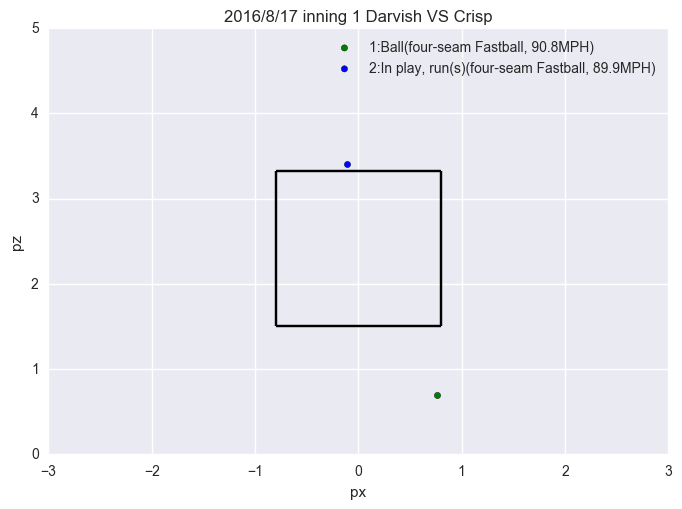

In [10]:
# figure settings
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title('2016/8/17 inning 1 Darvish VS Crisp')
ax.set_xlabel('px')
ax.set_xlim((-3.0, 3.0))
ax.set_ylabel('pz')
ax.set_ylim((0.0, 5.0))
ax.grid(True)

# Strike Zone
ax.vlines(-0.8, ymin=1.5, ymax=3.32)
ax.vlines(0.8, ymin=1.5, ymax=3.32)
ax.hlines(1.5, xmin=-0.8, xmax=0.8)
ax.hlines(3.32, xmin=-0.8, xmax=0.8)


# pitched
i = 1
for _, pitch in df_1_crisp.iterrows():
    c = get_color(pitch['pitch_res'])
    marker = get_marker(pitch['pitch_type'])
    label = '{cnt}:{event}({type}, {speed}MPH)'.format(
        **{
            'cnt': i,
            'speed': pitch['start_speed'],
            'type': PITCH_TYPES.get(pitch['pitch_type'], 'UN'),
            'event': pitch['pitch_des'],
        }
    )
    ax.scatter(pitch['px'], pitch['pz'], label=label, c=c, marker=marker)
    i += 1

ax.legend()

In [11]:
#  inning 1 Darvish VS Valencia(Strike out)
# data
df_1_v = df.query('inning_number==1 and bat_box_name=="Valencia"')
df_1_v[['bat_box_name', 'px', 'pz', 'sz_top', 'sz_bot', 'pitch_type', 'pitch_res', 'start_speed', 'pitch_des']].describe()

,px,pz,sz_top,sz_bot,start_speed
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,-0.209833,2.155167,3.451667,1.580000,87.400000
std,1.131759,1.038838,0.069113,0.102956,7.242928
min,-2.332000,0.702000,3.360000,1.390000,78.000000
25%,-0.425250,1.628750,3.425000,1.557500,81.350000
50%,0.312500,1.987000,3.445000,1.640000,90.750000
75%,0.503500,2.983500,3.465000,1.640000,92.125000
max,0.552000,3.430000,3.570000,1.640000,94.100000


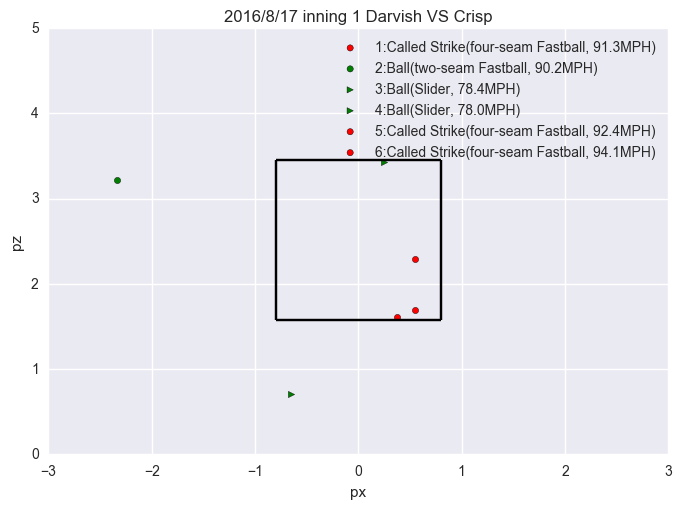

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title('2016/8/17 inning 1 Darvish VS Crisp')
ax.set_xlabel('px')
ax.set_xlim((-3.0, 3.0))
ax.set_ylabel('pz')
ax.set_ylim((0.0, 5.0))
ax.grid(True)

# Strike Zone
ax.vlines(-0.8, ymin=1.58, ymax=3.45)
ax.vlines(0.8, ymin=1.58, ymax=3.45)
ax.hlines(1.58, xmin=-0.8, xmax=0.8)
ax.hlines(3.45, xmin=-0.8, xmax=0.8)


# pitched
ii = 1
for _, pitch in df_1_v.iterrows():
    c = get_color(pitch['pitch_res'])
    marker = get_marker(pitch['pitch_type'])
    label = '{cnt}:{event}({type}, {speed}MPH)'.format(
        **{
            'cnt': ii,
            'speed': pitch['start_speed'],
            'type': PITCH_TYPES.get(pitch['pitch_type'], 'UN'),
            'event': pitch['pitch_des'],
        }
    )
    ax.scatter(pitch['px'], pitch['pz'], label=label, c=c, marker=marker)
    ii +=1

ax.legend()